In [ ]:
import sys
import os
sys.path.append(os.getenv('DEV_HOME'))
sys.path.append(os.getenv('SITES_HOME'))

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from matplotlib import ticker
import matplotlib.dates as mdates
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import covid_ont
from covid_ont import dataset_read, dataset_get, DIR_IMAGES

In [4]:
# dataset_get('Vaccinations')

In [5]:
# dataset_get('Cases by PHU')

In [6]:
df_vac_src=dataset_read('Vaccinations')

In [7]:
df_cases_src=dataset_read('Cases by PHU')

In [8]:
df_cases=df_cases_src[['Date', 'Total']]
df_cases.columns=['Date', 'New Cases']                 

In [9]:
df_vac=df_vac_src[['report_date', 'total_individuals_fully_vaccinated']]
df_vac.columns=['Date', 'Fully Vaccinated Total']

In [10]:
df_plot=pd.merge(df_vac, df_cases, on='Date')
# df_plot['Fully Vaccinated Total']=df_plot['Fully Vaccinated Total'].str.replace('.', '')
df_plot.fillna(0, inplace=True)
df_plot['Fully Vaccinated Total']=df_plot['Fully Vaccinated Total'].astype(int)
df_plot.drop(df_plot[df_plot['Fully Vaccinated Total']==0].index, inplace=True)
df_plot['Date']=pd.to_datetime(df_plot['Date'])
df_plot.set_index('Date', inplace=True)

In [17]:
def make_plot(df_plot):
    f_plot='vaccases-1700x600.png'
    last_updated=str(df_plot.index.max().strftime('%d-%b-%Y'))
    fig, ax1 = plt.subplots(1, 1, figsize=(17,7))
    plt.style.use('fast')
    ax2=ax1.twinx()
    df_plot.plot(ax=ax1, kind='area', alpha=0.8, y='New Cases', color='red', label='Cases')
    df_plot.plot(ax=ax2, kind='area', alpha=0.5, y='Fully Vaccinated Total', color='green', label='Vaccinated')
    ax1.set_xlabel('')
    ax1.legend(loc=0, bbox_to_anchor=(0.12, 1.08))
    ax2.legend(loc=1, bbox_to_anchor=(0.96, 1.08))
    ax1.spines['left'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
    ax1.xaxis.set_major_formatter(DateFormatter("%d-%b-%Y"))
    ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.title('Fully Vaccinated vs. Daily New Cases', fontsize=18)
    plt.annotate(last_updated, xy=(550, 370), xycoords='figure points', color='red', fontsize=17) # last updated
    fig.savefig(DIR_IMAGES + f_plot, facecolor='oldlace')


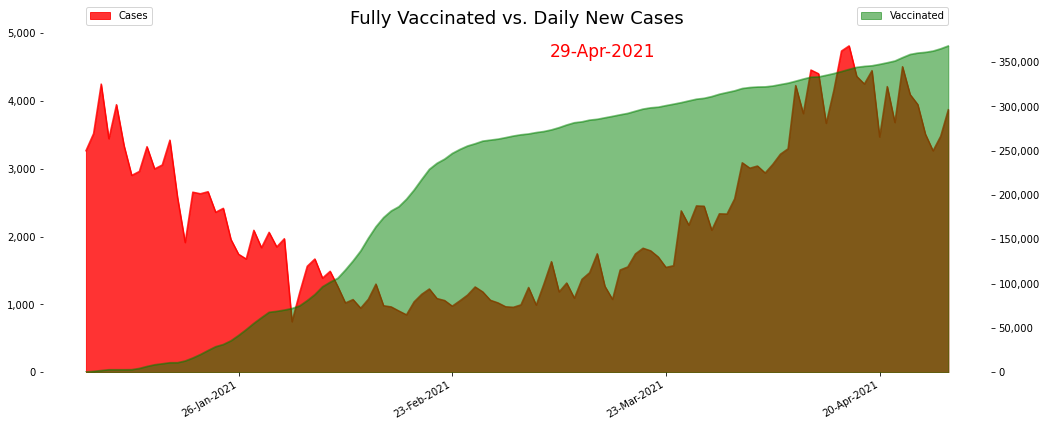

In [18]:
make_plot(df_plot)

In [13]:
df_plot.dtypes

Fully Vaccinated Total    int64
New Cases                 int64
dtype: object

In [14]:
df_plot

,Fully Vaccinated Total,New Cases
Date,,
2021-01-06,430,3266
2021-01-07,1087,3519
2021-01-08,2027,4249
2021-01-09,2940,3443
2021-01-10,2942,3945
...,...,...
2021-04-25,360354,3947
2021-04-26,361166,3510
2021-04-27,362563,3265


In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [16]:
DIR_IMAGES

'/Users/Vitaly/DEV/ds/advanced/covid_ont/site/assets/images/'